# 1. HC



## (1)
Hierarchical clustering (한글 : 계층적 군집 분석) 은 비슷한 군집끼리 묶어 가면서 최종 적으로는 하나의 케이스가 될때까지 군집을 묶는 클러스터링 알고리즘이다. 군집간의 거리를 기반으로 클러스터링을 하는 알고리즘이며, K Means와는 다르게 군집의 수를 미리 정해주지 않아도 된다.

출처: https://bcho.tistory.com/1204 [조대협의 블로그]

In [1]:
# Read IRIS Sample data

from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Cluster with Hierachical Clustering

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data, method='complete')
# 20201110 method에는 average, complete, single이 있음

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
# 20201110 dendrogram에서 as_matrix가 없어져서 오류 발생
# 20201110 출처의 깃 주소로 가면 결과는 볼 수 있음
dendrogram(mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [ ]:
# Cross tabulazation. Evaluate clustering result

from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(mergings,3,criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)

## (2)

http://blog.naver.com/samsjang/221019280298

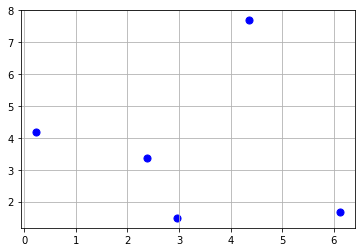

In [14]:
import pandas as pd
import numpy as np

np.random.seed(111)
var=['X','Y']
labels=['점0','점1','점2','점3','점4']
X=np.random.random_sample([5,2])*10
df=pd.DataFrame(X,columns=var,index=labels)

plt.scatter(X[:,0],X[:,1],c='blue',marker='o',s=50)
plt.grid(True)
plt.show()
# 20201110 x축 기준 왼쪽부터 점3, 4, 2, 1, 0

In [15]:
# 점0~점4의 거리행렬 구하기
from scipy.spatial.distance import pdist, squareform

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix), columns=labels,index=labels)
print(row_dist)

          점0        점1        점2        점3        점4
점0  0.000000  6.254970  3.174696  6.409487  4.097740
점1  6.254970  0.000000  6.358690  5.411807  4.745963
점2  3.174696  6.358690  0.000000  3.846035  1.968201
점3  6.409487  5.411807  3.846035  0.000000  2.314338
점4  4.097740  4.745963  1.968201  2.314338  0.000000


In [17]:
# 완전연결 기법을 적용한 응집형 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(distmatrix, method='complete')
#row_clusters=linkage(df.values, method='complete',metric='euclidean') # 같은 기능 수행
pd.DataFrame(row_clusters,
             columns=['클러스터ID_1','클러스터ID_2','거리','클러스터 멤버수'],
             index=['클러스터 %d' %(i+1) for i in range(row_clusters.shape[0])])

,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_

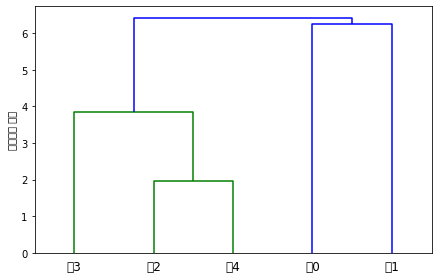

In [18]:
#linkage의 리턴값을 이용하여 덴드로그램 생성

from scipy.cluster.hierarchy import dendrogram

row_dendr=dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()

# 덴드로그램을 보면 점2, 점4는 하나의 클러스터로 봐도 무방할 정도로 유클리드 거리가 작지만
# 점0과 점1은 하나의 클러스터로 보기에는 상대적으로 부적절하다는 것을 알 수 있습니다
# 20201110 덴드로그램 x축은 왼쪽부터 순서대로 점3, 2, 4, 0, 1이다

덴드로그램이 실제로 활용될 때 아래와 같이 상관도를 색상으로 표현해주는 히트맵과 조합하여 표시해주면 더욱 직관적으로 파악할 수 있다
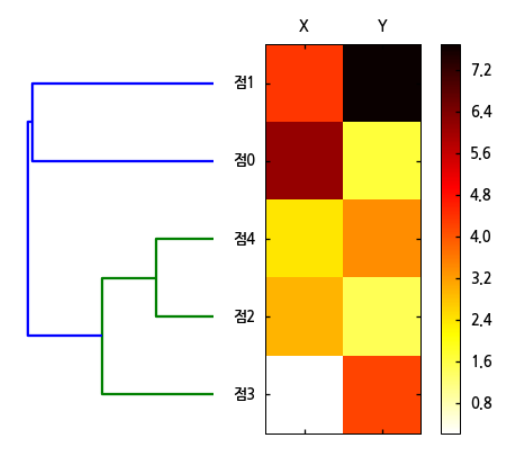

In [19]:
# 사이킷런은 응집형 계층적 클러스터링을 위해 아래 클래스를 제공하며,
# 계층적 클러스터링에 의해 최종적으로 분류된 클러스터에 대한 정보만 보여줌

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
labels=ac.fit_predict(X)
print('클러스터 분류 결과: ',labels)
# 결과를 해석하면 점 0,1은 클러스터0, 점2, 3, 4는 클러스터1로 분류된다는 것

클러스터 분류 결과:  [0 0 1 1 1]


## (3)

https://subinium.github.io/MLwithPython-3-5/
### 3.5.2 병합 군집
#### 사이킷런은 종료조건이 미리 설정해둔 클러스터 수라고 해서 여기에 옮겨적지 않음

Text(0, 0.5, 'cluster distance')

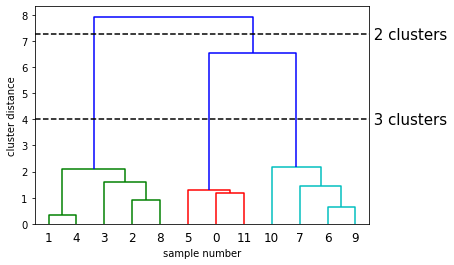

In [22]:
from sklearn.datasets import make_blobs

# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 2 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 3 clusters', va='center', fontdict={'size': 15})
plt.xlabel("sample number")
plt.ylabel("cluster distance")

# 2. DBSCAN



## (1)
앞에서 설명한 K Means나 Hierarchical 클러스터링의 경우 군집간의 거리를 이용하여 클러스터링을 하는 방법인데, 밀도 기반의 클러스터링은 점이 세밀하게 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식이다. 

쉽게 설명하면, 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식이다.



출처: https://bcho.tistory.com/1205?category=555440 [조대협의 블로그]

In [24]:
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
# 학습에 사용할 피쳐를 feature에 저장
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

# 다음은 모델을 선언하고, 데이타를 넣어서 학습을 시킨다.
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

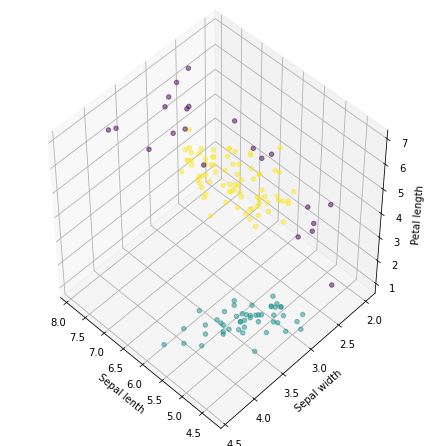

In [27]:
# 학습이 끝난 결과를 다음과 같이 3차원 그래프로 시각화 해보자. 
# 아래 시각화는 3차원인데, 학습은 4차원으로 하였다. 
# 그래서 다소 오류가 있어 보일 수 있다.
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [29]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1
labels             
0         1  49   0
1         6   0  44
2        15   0  35


## (2) 

http://blog.naver.com/PostView.nhn?blogId=samsjang&logNo=221023672149&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Using matplotlib backend: agg


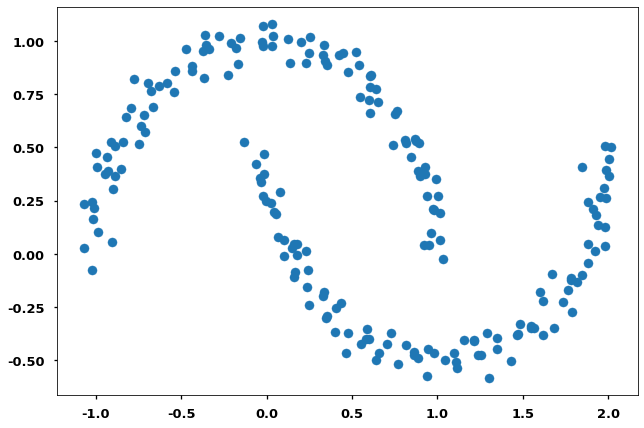

In [30]:
%matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

style.use('seaborn-talk')

krfont={'family':'NanumGothic','weight':'bold','size':10}
matplotlib.rc('font',**krfont)
matplotlib.rcParams['axes.unicode_minus']=False

X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [32]:
def plotResult(X,y,title='클러스터링 결과'):
  plt.scatter(X[y==0,0],X[y==0,1], c='lightblue',marker='o',s=40,
              label='클러스터1')
  plt.scatter(X[y==1,0],X[y==1,1], c='red',marker='s',s=40,
              label='클러스터2')
  
  plt.title(title)
  plt.legend()
  plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_

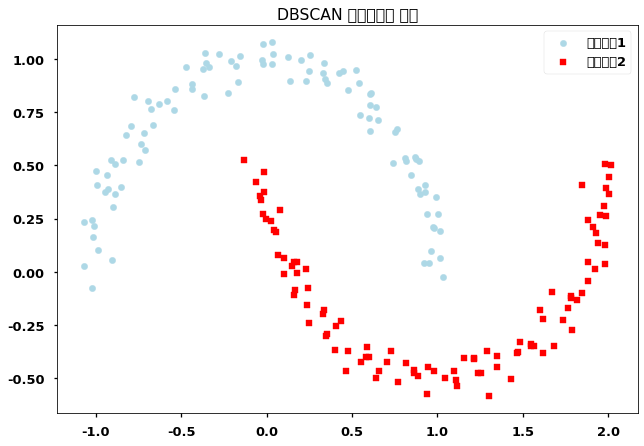

In [33]:
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)

plotResult(X,y_db,title='DBSCAN 클러스터링 결과')

## (3) 

https://subinium.github.io/MLwithPython-3-5/
### 3.5.3 DBSCAN

In [37]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=269d3749df19015ed1c4c351d86e442bd5acc16b9890b86ee40d81283f80ae91
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [40]:
from sklearn.cluster import DBSCAN
import mglearn
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters))
# 모든 포인트에 잡음 포이인트를 의미하는 -1이 할당되었고, 
# 이는 작은 샘플에 적합하지 않은 eps와 min_samples 기본값 때문입니다.

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


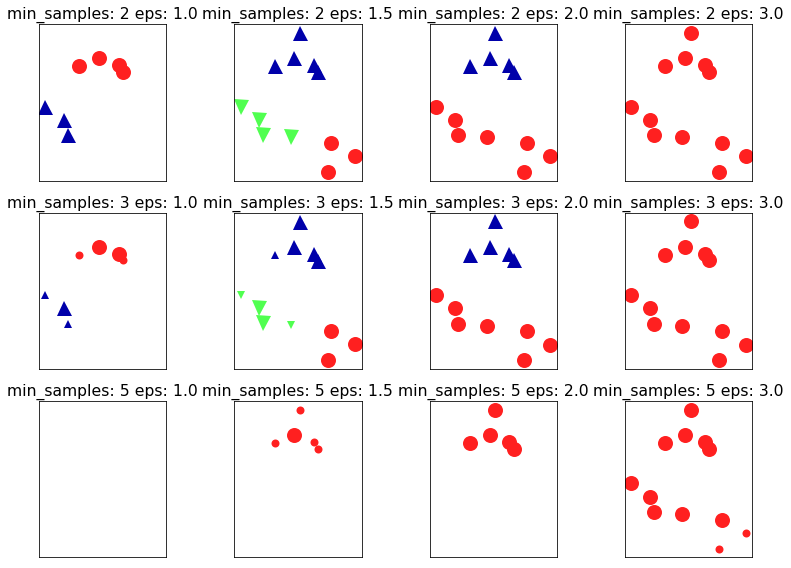

In [41]:
# 여러가지 변수 값에 대한 클러스터 할당을 체크해봅시다.
mglearn.plots.plot_dbscan()
# 이 그래프에서 클러스터에 속한 포인트는 색을 칠하고 
# 잡음 포인트는 하얀색으로 남겨뒀습니다. 
# 핵심 샘플은 크게 표시하고 경계 포인트는 작게 나타냈습니다. 

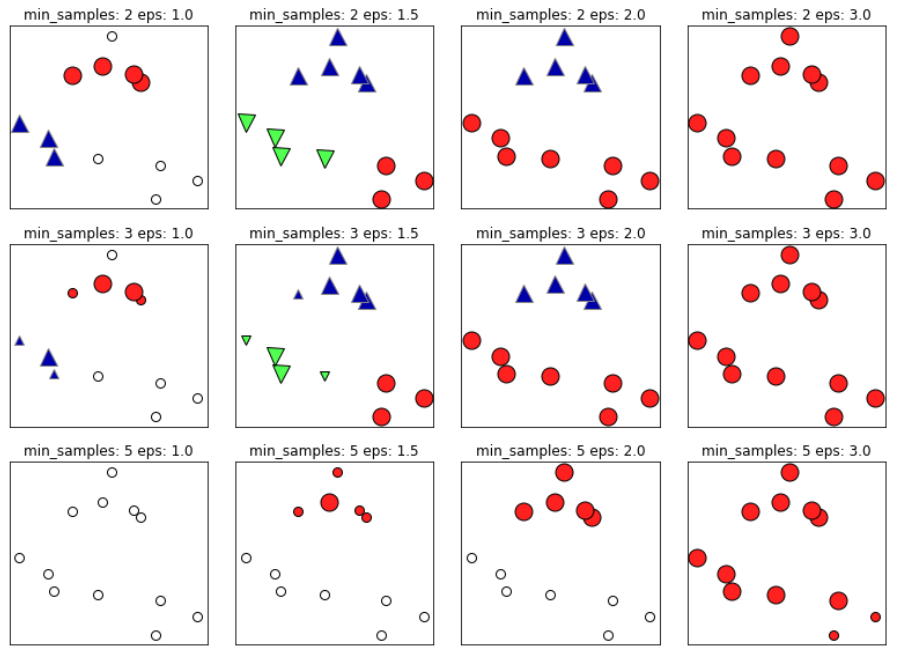

Text(0, 0.5, 'feature 1')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


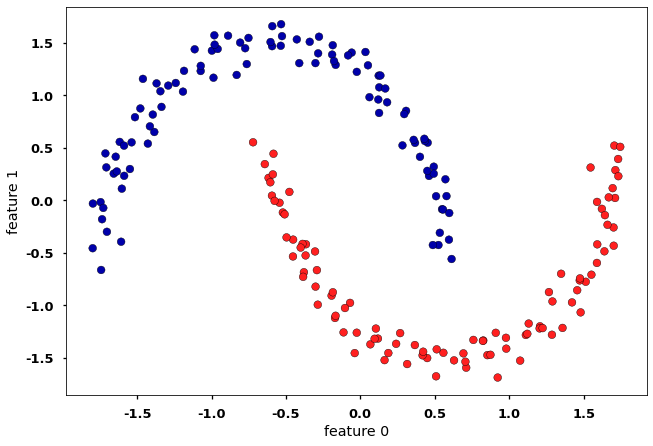

In [45]:
#  DBSCAN은 클러스터의 개수를 지정할 필요가 없지만 매개변수를 통해 제어합니다. 
# 적절한 eps 값을 쉽게 찾으려면 StandardScaler나 MinMaxScaler로 
# 모든 특성의 스케일을 비슷한 범위로 조정해주는 것이 좋습니다. 
# 아래는 two_moons 데이터셋에 DBSCAN을 적용한 결과입니다. 
# 기본 설정값으로 진행하여 두 개의 반달을 정확히 찾아 구분하였습니다.
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# 결론?
## - HC를 한다면 scipy로 진행, 거리배열 계산 필요
## - DBSCAN을 한다면 sklearn으로 진행
## - 현재 DBSCAN이 가장 장점이 많은? 데이터의 형태를 가장 덜 신경 써도 되는 모델로 보임